### Prospect Mapping 2

#### After meeting
- Establishment Aplicor ID will be useful to group the same schools
- Option and completed are the good indiators from the stage
- Maybe take averages rather than adding deciles to then be able to remove characteristics without a value
- PP bracket is how much government help they get in percentage


In [62]:
# importing the necessary modules
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import close as clc
# Importing the data from the .xlsx as a data frame using the pandas module
df = pd.read_csv("PGL_data.csv", low_memory = False)

#Removing the unecessary columns by name
df.drop(columns = {'Column21', 'Column22', 'Column23', 'Column24'}, inplace=True)
col = df.columns.tolist()

print('index  |                     column name     |    number of entries')
print('-------------------------------------------------------------------------------------')
for heading in col:
    print("%3.0f    |    %30s   |    %8.0f" % (col.index(heading), heading, len(df[heading].loc[df[heading].notna()])))
print('-------------------------------------------------------------------------------------')

index  |                     column name     |    number of entries
-------------------------------------------------------------------------------------
  0    |                      Account Name   |      187864
  1    |          Establishment Aplicor ID   |      187858
  2    |                Contact Aplicor ID   |      187864
  3    |                             Stage   |      187514
  4    |                Opportunity Source   |       87182
  5    |                       Loss Reason   |       51912
  6    |                           Product   |      183022
  7    |                            Course   |       59973
  8    |                 Booking Reference   |      187864
  9    |             Centre(s) of Interest   |       63827
 10    |                Accommodation Type   |       21327
 11    |                      Arrival Date   |      165044
 12    |                      Booking Date   |      139149
 13    |                         Age Range   |       59343
 14    |            

The schools need to be grouped, lets see how many there are.

In [63]:
print('Establishment Aplicor ID \t      | amount of entries')
print('----------------------------------------------------------')
df[col[1]].loc[df[col[1]].notna()].value_counts().head(5)

Establishment Aplicor ID 	      | amount of entries
----------------------------------------------------------


D3CDEA22-A407-4D55-8BB6-2CDEFA39D20B    591
90019712-630C-46A5-97DA-3700973C36D4    139
5418D529-39E2-451F-8FC0-12ED43A769D0    114
750A0A98-2D53-451B-B4C0-D027AB49A048    106
818D43DF-714A-4259-B90D-FA57279CDE5E    103
Name: Establishment Aplicor ID, dtype: int64

***
So there are 20,608 schools on this record. By looking at the school that has 591 entries, the characteristics can be studied and see what they have in common with the other schools that have repeatedly used PGL.

In [64]:
df.loc[df[col[1]] == 'D3CDEA22-A407-4D55-8BB6-2CDEFA39D20B'].head(2)

,Account Name,Establishment Aplicor ID,Contact Aplicor ID,Stage,Opportunity Source,Loss Reason,Product,Course,Booking Reference,Centre(s) of Interest,...,New_Existing,Booking Season,Time Lapse Band,Number of Children Band,PP Bracket,School Size by Pupils Banding,By Radias to Nearest Centre,Establishmet_Type,Decile_Value,Decile_F&M
1221,PGL Hen Party (IT TEST RECORD) - nicktest2,D3CDEA22-A407-4D55-8BB6-2CDEFA39D20B,476E62B6-4BAE-4DEA-BE7D-6918F6D8A412,New,Brochure request,NaN,NaN,NaN,mm test,NaN,...,Existing,NaN,Do Not Apply,NaN,NaN,NaN,NaN,NaN,2.0,2.0
2069,PGL Hen Party (IT TEST RECORD) - nicktest2,D3CDEA22-A407-4D55-8BB6-2CDEFA39D20B,096de55f-840f-9dbd-cfab-652c03e85dc7,Closed - Not Quoted,Email,Reason not Listed,AUK (Adventure UK),NaN,AU21,NaN,...,Existing,NaN,Do Not Apply,NaN,NaN,NaN,NaN,NaN,2.0,2.0


***
Looks like this Establishment Aplicor ID has been created for Hen parties or an 'IT TEST RECORD'. Changed it to just print the first record for less clutter.

In [65]:
df.loc[df[col[1]] == '90019712-630C-46A5-97DA-3700973C36D4'].head(2)

,Account Name,Establishment Aplicor ID,Contact Aplicor ID,Stage,Opportunity Source,Loss Reason,Product,Course,Booking Reference,Centre(s) of Interest,...,New_Existing,Booking Season,Time Lapse Band,Number of Children Band,PP Bracket,School Size by Pupils Banding,By Radias to Nearest Centre,Establishmet_Type,Decile_Value,Decile_F&M
27249,Backwell School (Lighthouse Schools Partnership),90019712-630C-46A5-97DA-3700973C36D4,0EFAB743-3461-4EB9-A2DE-3B96C90E5C3E,Completed,NaN,NaN,OSA (Overseas Adventure),NaN,AF00000148,NaN,...,New,Spring,301-3000,21-50,0%-10%,1001-1500,45 - 50 Miles,Secondary,7.0,9.0
27250,Backwell School (Lighthouse Schools Partnership),90019712-630C-46A5-97DA-3700973C36D4,0DC0C86E-1262-4293-9D6E-A36A765093CB,Completed,NaN,NaN,OSA (Overseas Adventure),NaN,AF00000216,NaN,...,Existing,Summer,301-3000,21-50,0%-10%,1001-1500,45 - 50 Miles,Secondary,7.0,9.0


The next highest establishment is a school so I am gathering that the rest are real schools as well.

The line below takes the top 500 and lowest 500 schools based on how many times they have used PGL and stores them into top_establishents and lower_establishments respectively to compare how different columns compare between the two grroups.

In [66]:
top_establishments_interaction = df[col[1]].loc[df[col[1]].notna()].value_counts().head(50)
top_establishments = df[col[1]].loc[df[col[1]].notna()].value_counts().head(500).index.tolist()
lower_establishments = df[col[1]].loc[df[col[1]].notna()].value_counts().tail(500).index.tolist()
# removing the hen party IT one
top_establishments.remove('D3CDEA22-A407-4D55-8BB6-2CDEFA39D20B')

THinking about how to plot each cateogory, the first attempt just plotted all the values for eeach time the schools used PGL. For a band like the school size, this just skewed the bars as if a school used PGL 100 times then a bar would be representing 1 school 100 times. The lowest schools have probably only used them once so only 1 entry would be used. Because of this, the below function takes all the entries for each school and takes the mode of them. This seems the be the fairest option at the moment.

The function below takes a column of choice and an order of the options if applicable (if not enter 0 for this). It will then produce a barchart comparing the best and worst schools.

In [67]:
def mode_bar_bands(column,order):
    upper_schools = df.loc[df[col[1]].isin(top_establishments)]
    upper_mode= upper_schools.groupby([col[1]])[column].agg(pd.Series.mode).explode()
    upper_mode = upper_mode[(upper_mode.str.len() > 0)]
    
    lower_schools = df.loc[df[col[1]].isin(lower_establishments)]
    lower_mode = lower_schools.groupby([col[1]])[column].agg(pd.Series.mode).explode()
    lower_mode = lower_mode[lower_mode.str.len() > 0]
    
    d = pd.DataFrame({'upper_mode' : upper_mode.value_counts(normalize=True).mul(100), 'lower_mode' : lower_mode.value_counts(normalize=True).mul(100)})
    if order != 0:
        d.sort_index().loc[order].plot.bar()
    else:
        d.sort_index().plot.bar()
    plt.legend()
    plt.title('Chart to show the mode of each school for ' + column)
    plt.xlabel(column)
    plt.ylabel('Percentage of of schools [%]')
    
    print("Number of top schools used that have values = ", len(upper_mode))
    print("Number of bottom schools used that have values = ", len(lower_mode))

Number of top schools used that have values =  125
Number of bottom schools used that have values =  128


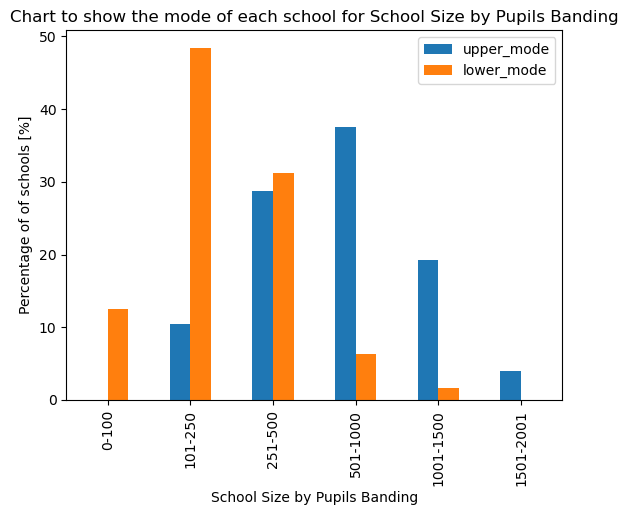

In [68]:
order = ['0-100','101-250','251-500','501-1000','1001-1500','1501-2001']
mode_bar_bands(col[44],order)

Looking at the influence of school size banding, it seems like the best schools are in the 501-1000 band and the worst seem to be in the 101-250. Interesting how its not the biggest and the smallest but this could also be because of the average size of schools which will play a factor. This meeans that PGL could still target the even larger schools fromm 500 upwards.

Number of top schools used that have values =  124
Number of bottom schools used that have values =  125


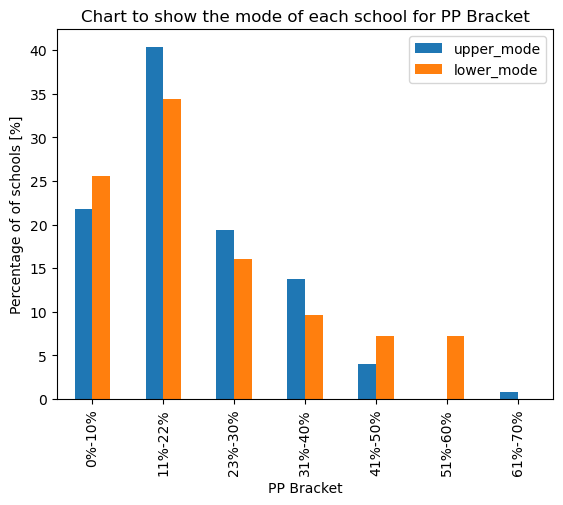

In [69]:
mode_bar_bands(col[43], 0)

Above shows that the schools that have used PGL the most tend to be in the 11-22% range for government funding. This is also shown by the worst schools as well though and the general trend seems to be the same. This may suggest that this column doesnt have much of an influnece.

Number of top schools used that have values =  530
Number of bottom schools used that have values =  261


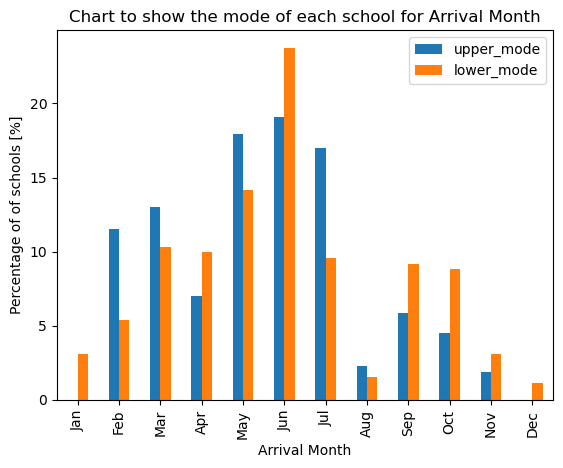

In [70]:
order_months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
mode_bar_bands(col[31],order_months)

Number of top schools used that have values =  506
Number of bottom schools used that have values =  482


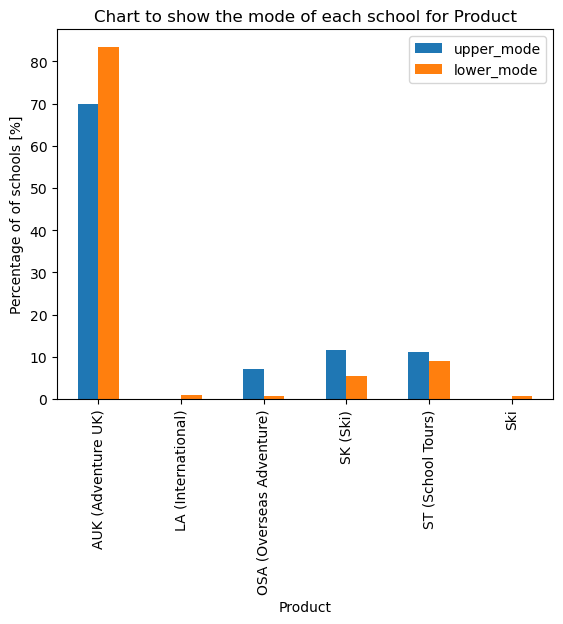

In [78]:
mode_bar_bands(col[6],0)

Number of top schools used that have values =  525
Number of bottom schools used that have values =  491


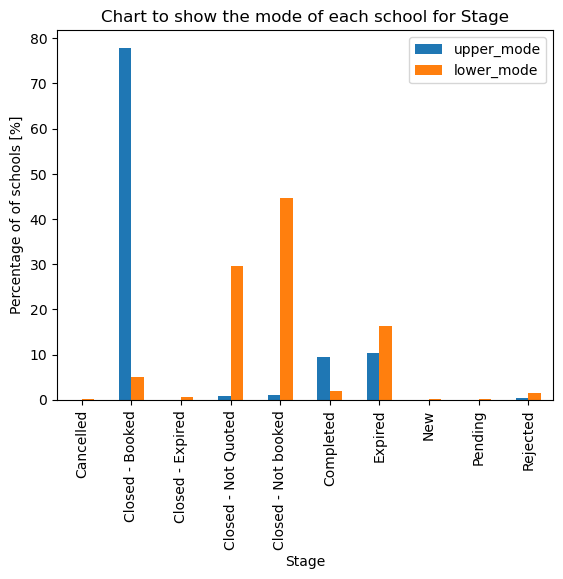

In [80]:
mode_bar_bands(col[3],0)

***

Now that function only works for the columns with bands. In order to use the columns that have a non-discretised value, the best solution will be to take the average of the numbers. The 

Number of top schools used that have values =  499
Number of bottom schools used that have values =  500


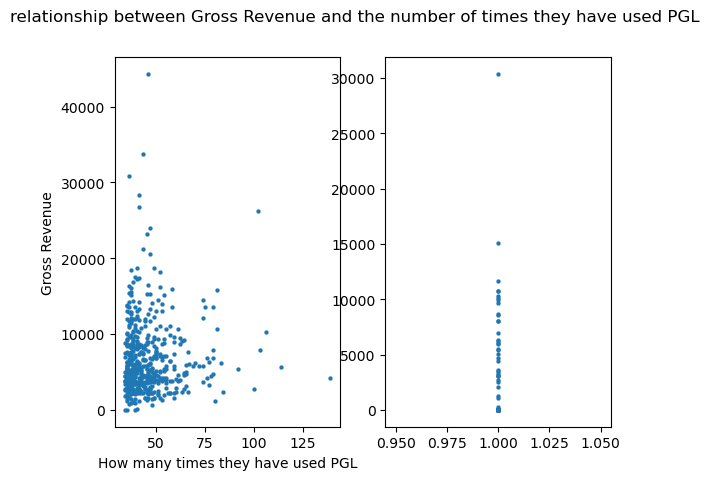

In [79]:
def average_bar(column,order):
    upper_schools = df.loc[df[col[1]].isin(top_establishments)]
    upper_school_interaction = upper_schools.value_counts(col[1])
    upper_mode= upper_schools.groupby([col[1]])[column].agg(pd.Series.mean)

    
    lower_schools = df.loc[df[col[1]].isin(lower_establishments)]
    lower_school_interaction = lower_schools.value_counts(col[1])
    lower_mode = lower_schools.groupby([col[1]])[column].agg(pd.Series.mean)

    #lower_mode = lower_mode[lower_mode.str.len() > 0]
    
    # d = pd.DataFrame({'upper_mode' : upper_mode, 'lower_mode' : lower_mode})
    # if order != 0:
    #     d.sort_index().loc[order].plot.scatter()
    # else:
    #     d.sort_index().plot.scatter()
    plt.subplot(1,2,1)
    plt.scatter(upper_school_interaction,upper_mode,marker='.',linewidths=0.1)
    plt.xlabel('How many times they have used PGL')
    plt.ylabel(column)
    plt.suptitle('relationship between '+column+' and the number of times they have used PGL')

    plt.subplot(1,2,2)
    plt.scatter(lower_school_interaction, lower_mode, marker='.', linewidths=0.1)
    # plt.legend()
    # plt.title('Chart to show the mode of each school for ' + column)
    # plt.xlabel(column)
    # plt.ylabel('Percentage of of schools [%]')
    
    print("Number of top schools used that have values = ", len(upper_mode))
    print("Number of bottom schools used that have values = ", len(lower_mode))

average_bar(col[22],0)